Saving circle.jpg to circle (6).jpg


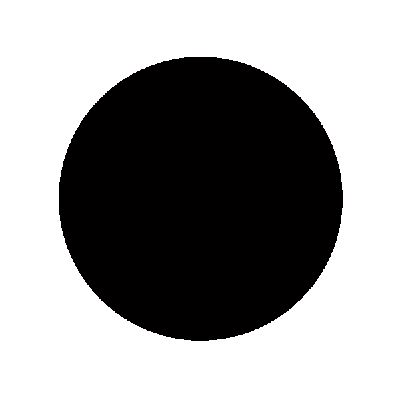

In [27]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from skimage import io
from scipy.ndimage import convolve
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt


uploaded = files.upload()
file_name = 'circle.jpg'
image = cv2.imread(file_name)
cv2_imshow(image)

(399, 400, 3)


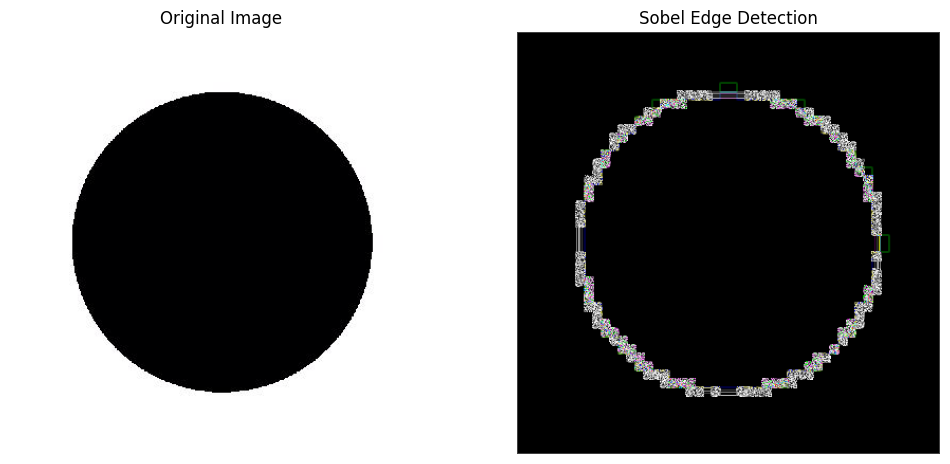

In [28]:
# Define Sobel operators
Sx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Sy = np.array([[ 1,  2,  1],
               [ 0,  0,  0],
               [-1, -2, -1]])

# Apply Sobel operators for each channel
sobel_x_filtered = np.dstack([
    convolve(image[:, :, channel], Sx, mode="constant", cval=0.0)
    for channel in range(3)
])

sobel_y_filtered = np.dstack([
    convolve(image[:, :, channel], Sy, mode="constant", cval=0.0)
    for channel in range(3)
])

# Combine the edges from both directions
edges = np.sqrt(sobel_x_filtered**2 + sobel_y_filtered**2)

# Normalize the result for display
edges = (edges - edges.min()) / (edges.max() - edges.min())

# Ensure the data type is float in the range [0, 1] for display
edges = edges.astype(np.float64)

print(edges.shape)

# Display the original and edge-detected images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.show()

In [29]:


laplace_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplace_filter

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

(399, 400, 3)


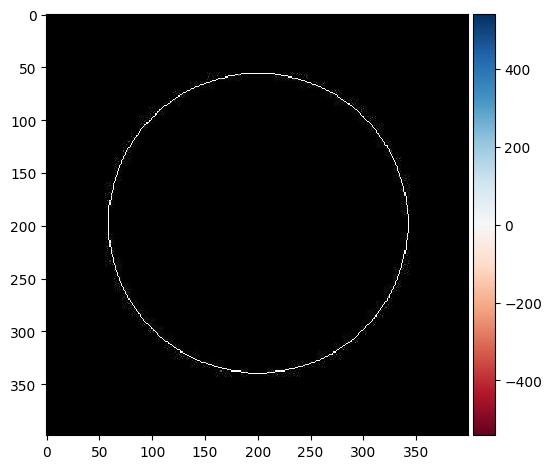

In [30]:


laplace_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplace_filter
from scipy.signal import convolve


filtered_image = np.dstack([
    convolve(image[:, :, channel], laplace_filter, mode="same")
    for channel in range(3)
])

print(filtered_image.shape)
filtered_image.min()
io.imshow(filtered_image)

In [31]:
from scipy.signal import convolve


filtered_image = np.dstack([
    convolve(image[:, :, channel], laplace_filter, mode="same")
    for channel in range(3)
])

print(filtered_image.shape)


(399, 400, 3)


In [32]:
filtered_image.min()

-536

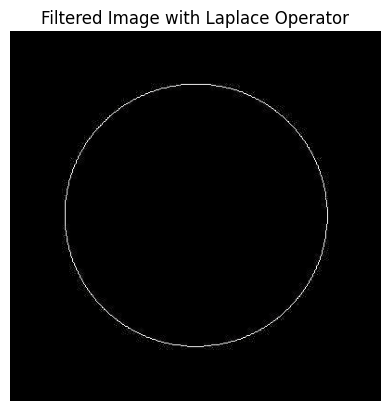

(399, 400, 3)
-536


In [33]:
#io.imshow(filtered_image)
# Wyświetlamy obraz
plt.figure()
plt.imshow(filtered_image)
plt.title("Filtered Image with Laplace Operator")  # Dodajemy podpis do obrazka
plt.axis('off')  # Wyłączamy osie
plt.show()

print(filtered_image.shape)
print(filtered_image.min())

In [34]:
import numpy as np
from scipy.ndimage import convolve
import imageio

# Definicja jądra Gaussa
G = np.array([[1, 2, 1],
              [1, 4, 1],
              [1, 2, 1]]) / 16
# Zastosowanie filtru Gaussa do każdego kanału obrazu
gaussian_blurred_image = np.dstack([
    convolve(image[:, :, channel], G, mode="constant")
    for channel in range(3)  # Dla trzech kanałów RGB
])

print(gaussian_blurred_image.shape)

(399, 400, 3)


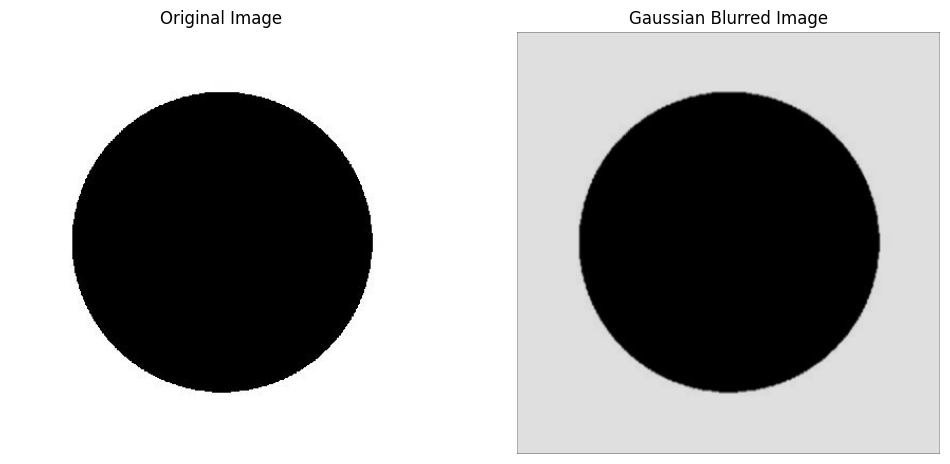

In [36]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_blurred_image.astype(np.uint8))  # Convert to uint8 for displaying
plt.title("Gaussian Blurred Image")
plt.axis('off')

plt.show()


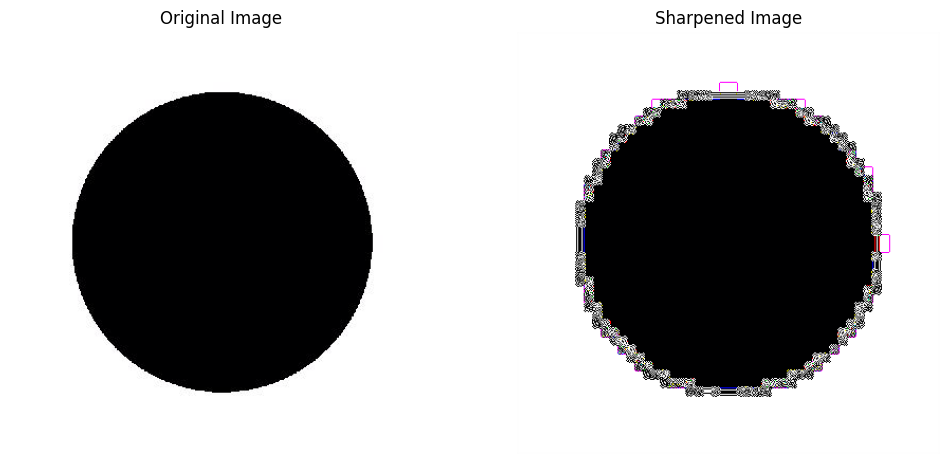

In [38]:

mean_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
mean_filter = mean_filter / mean_filter.sum()
mean_filter
filtered_image = np.dstack([
    convolve(image[:, :, channel], mean_filter, mode="constant", cval=0.0)
    for channel in range(3)
])# Define the sharpening kernel again
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])



# Display the shape of the filtered image
filtered_image.shape
# Plot the original and the sharpened image for visual comparison
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display sharpened image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Show the plot
plt.show()

In [40]:
#Gaus 5x5

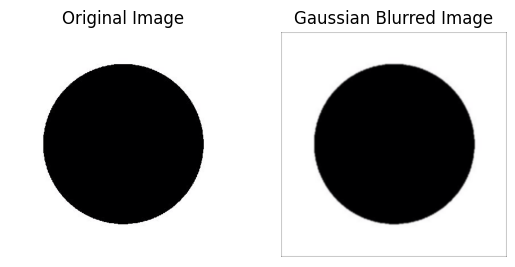

In [41]:
# matrix 5x5 gaus
import numpy as np
from scipy.ndimage import convolve

G = np.array([[1,  4,  6,  4, 1],

              [4, 16, 24, 16, 4],

              [6, 24, 36, 24, 6],

              [4, 16, 24, 16, 4],

              [1,  4,  6,  4, 1]]) / 256


filtered_image = np.dstack([

    convolve(image[:, :, channel], G, mode="constant", cval=0.0)

    for channel in range(3)

])





filtered_image.shape
# Display original image

plt.subplot(1, 2, 1)

plt.imshow(image)

plt.title("Original Image")

plt.axis('off')


# Display filtered image

plt.subplot(1, 2, 2)

plt.imshow(filtered_image)

plt.title("Gaussian Blurred Image")

plt.axis('off')



plt.show()

In [42]:
# Scharr operators

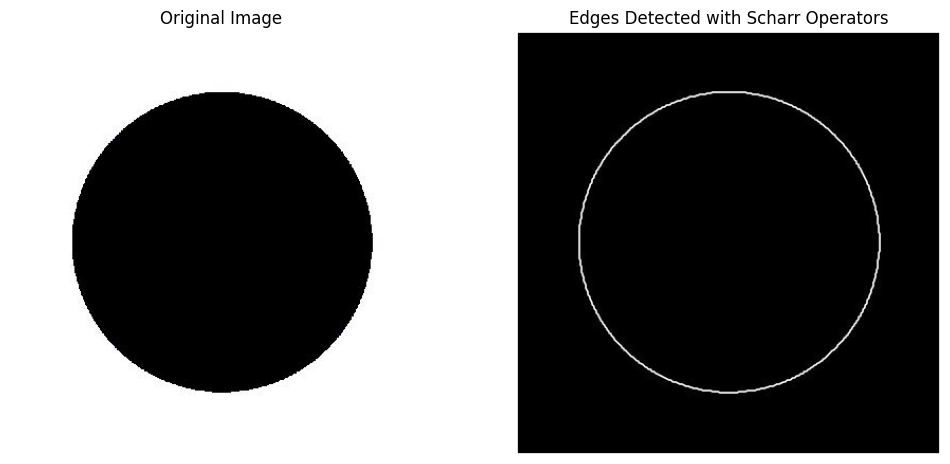

In [43]:
## Define Scharr operators
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, color



if image.ndim == 3 and image.shape[2] == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image


Sx = np.array([[3, 0, -3],
               [10, 0, -10],
               [3, 0, -3]])
Sy = np.array([[3, 10, 3],
               [0, 0, 0],
               [-3, -10, -3]])

# Apply the Scharr operators to the grayscale image
scharr_x_filtered = convolve(image_gray, Sx, mode="constant", cval=0.0)
scharr_y_filtered = convolve(image_gray, Sy, mode="constant", cval=0.0)

# Combine the results from both directions
scharr_filtered_image = np.sqrt(scharr_x_filtered**2 + scharr_y_filtered**2)

# Normalize the result
scharr_filtered_image = (scharr_filtered_image - scharr_filtered_image.min()) / (scharr_filtered_image.max() - scharr_filtered_image.min())

# Display the original and edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
if image.ndim == 3 and image.shape[2] == 3:
    plt.imshow(image)  # Display in color if the original image is colored
else:
    plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(scharr_filtered_image, cmap='gray')
plt.title("Edges Detected with Scharr Operators")
plt.axis('off')

plt.show()


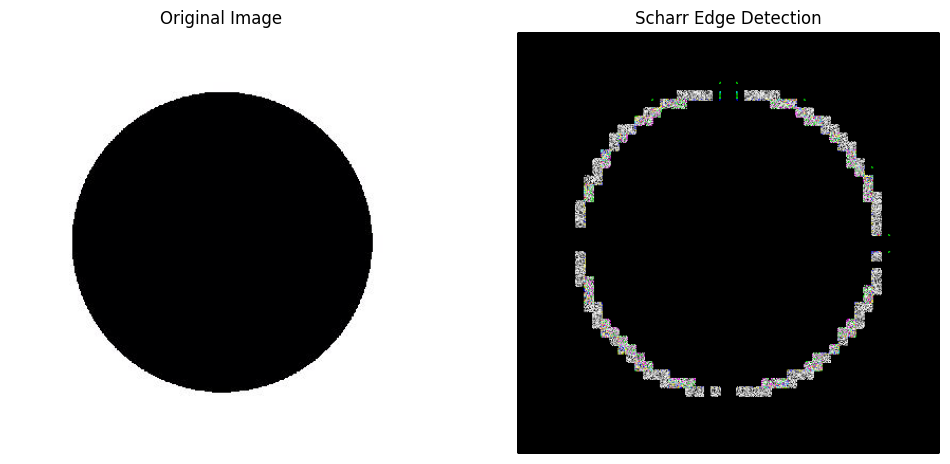

In [45]:


# Definiuj operatory Scharr
Sx = np.array([[3, 0, -3],
               [10, 0, -10],
               [3, 0, -3]])
Sy = np.array([[3, 10, 3],
               [0, 0, 0],
               [-3, -10, -3]])

# Funkcja do wykrywania krawędzi na pojedynczym kanale
def apply_scharr(channel, operator):
    return convolve(channel, operator, mode="constant", cval=0.0)

# Stosowanie operatorów Scharr do każdego kanału koloru
scharr_x_filtered = np.dstack([
    apply_scharr(image[:, :, channel], Sx)
    for channel in range(3)
])

scharr_y_filtered = np.dstack([
    apply_scharr(image[:, :, channel], Sy)
    for channel in range(3)
])

# Łączenie krawędzi z obu kierunków
edges = np.sqrt(scharr_x_filtered**2 + scharr_y_filtered**2)

# Normalizacja wyniku do wyświetlenia
edges = (edges - edges.min()) / (edges.max() - edges.min())

# Upewnij się, że typ danych to float w zakresie [0, 1] do wyświetlania
edges = edges.astype(np.float64)

# Wyświetlanie obrazów
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges)
plt.title("Scharr Edge Detection")
plt.axis('off')

plt.show()




In [ ]:
#Prewitt operators

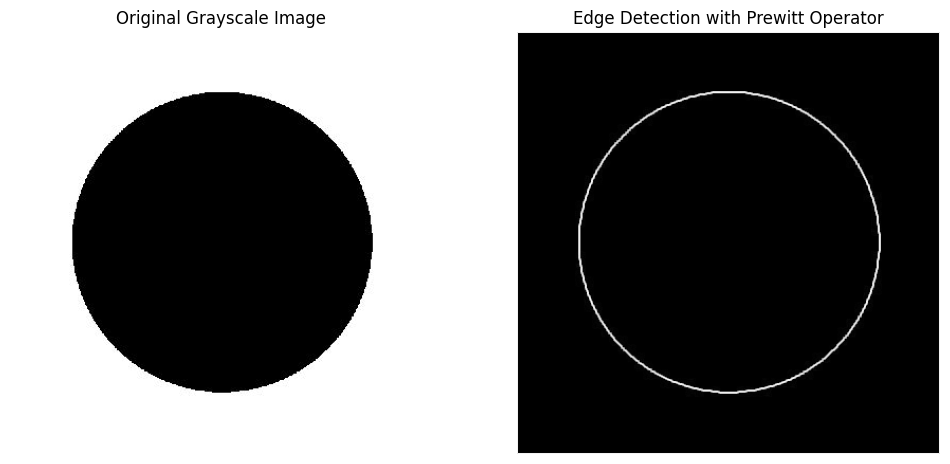

In [46]:
import numpy as np

from scipy.ndimage import convolve

import matplotlib.pyplot as plt

# Define Prewitt operators
Px = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])
Py = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1, -1, -1]])

# Apply the Prewitt operators to the grayscale image
prewitt_x_filtered = convolve(image_gray, Px, mode="constant", cval=0.0)
prewitt_y_filtered = convolve(image_gray, Py, mode="constant", cval=0.0)

# Combine the results from both directions
prewitt_filtered_image = np.sqrt(prewitt_x_filtered**2 + prewitt_y_filtered**2)

# Normalize the result
prewitt_filtered_image = (prewitt_filtered_image - prewitt_filtered_image.min()) / \
                         (prewitt_filtered_image.max() - prewitt_filtered_image.min())

# Display the original and edge-detected images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prewitt_filtered_image, cmap='gray')
plt.title("Edge Detection with Prewitt Operator")
plt.axis('off')

plt.show()